In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vice
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from surp._globals import AGB_MODELS
import surp

In [35]:
a_agb = surp.yield_models.C_AGB_Model(t_D=0.3, tau_agb=0.45)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.03, 13.2)

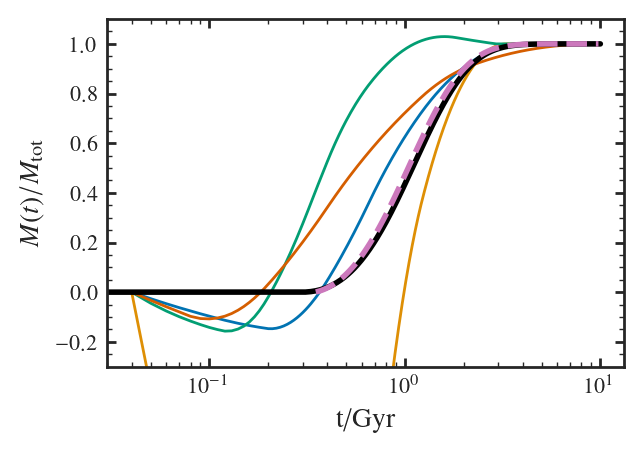

In [50]:

vice.yields.ccsne.settings["c"] = 0
vice.yields.sneia.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0

for i in range(4):
    model = AGB_MODELS[i]
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0)
    m_c = [c for c in m_c]
    plt.plot(times, np.array(m_c)/m_c[-1])


vice.yields.agb.settings["c"] = a_agb

m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0)
m_c = [c for c in m_c]

plt.plot(times, np.array(m_c)/m_c[-1], lw=2, color="k")


times = np.logspace(-1.3, 1, 100)
R = times * np.exp(-times / 0.45)
y = np.cumsum(R[:-1] * (times[1:] - times[:-1]))
plt.plot(times[:-1] + 0.3, y/y[-1], lw=2, ls="--")


plt.xlabel("t/Gyr")
plt.ylabel(r"$M(t)/M_{\rm tot}$")
plt.xscale("log")
plt.legend()
plt.ylim(-0.3, 1.1)
plt.xlim(0.03, 13.2)

In [ ]:
for i in range(len(AGB_MODELS)):
    model = AGB_MODELS[i]

    vice.yields.agb.settings["c"] = model
    vice.yields.ccsne.settings["c"] = 0
    Zs = 0.014*10**np.linspace(-2, 1, 100)
    
    # plots importaint points
    if type(model) == str:
        y1, m1, z1 = vice.yields.agb.grid('c', study=model)
        Zs = np.array(z1)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
        
    y_c_agb = np.array(mass_yields)/1e6 
    plt.scatter(np.log10(Zs/0.014), y_c_agb)

   
# pass
""
vice.yields.agb.settings["c"] = a_agb

Zs = 0.014*10**np.linspace(-2, 0.5, 100)
mass_yields = []
for Z in Zs:
    m_c, times = vice.single_stellar_population("c", Z=Z)
    mass_yields.append(m_c[-1])

y_c_agb = np.array(mass_yields)/1e6 

plt.plot(np.log10(Zs/0.014), y_c_agb)
plt.xlabel("[Mg/H]")
plt.ylabel("$y_c$")